#### Pseudo Facebook data analysis - UPX Project ###

In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pandas_profiling

local_path='F:/ML/UPX Course/Project/'
# sns.set_context('talk')
# sns.set_style('white')

In [2]:
#Load dataset as pandas dataframe

facebook_data = pd.read_csv("F:/ML/UPX Course/Project/Project Datasets/Project_5_Facebook_data/pseudo_facebook.csv", sep = ',')

In [7]:
#sneakpeek at data
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [8]:
#more info about data
facebook_data.info()

#gender and tenure are missing in a few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [9]:
#Pandas profiling report generated

report = pandas_profiling.ProfileReport(facebook_data)
report.to_file("FaceBook.html")

Dataset looks good. Not many values are missing. Data types are right

useful analysis would be

1. Number of users by age, gender -done
2. Average likes by age, gender - done
3. Average Number of friends by age, gender - done
4. Number of likes by mode (mobile) by age, gender
5. Number of likes by mode (www) by age, gender
6. relationship amongst variables
    - relationship between number of likes, friendship_count and tenure
    - relationship between number of likes_received and friendship_count and tenure
    - relationship between day of birth and friendship_count
    - relationship between month of birth and friendship_count
10. distribution of users age

In [3]:
# drop all the rows with missing values.
facebook_data = facebook_data.dropna(axis=0, how='any')

In [4]:
#counting number of users > 100 years of age
#this data might be incorrect, however removal of this requires confirmation from Business if 
users_above_100 = facebook_data[(facebook_data['age'] > 100)].count()

print("Total users above 100 years are",users_above_100[0])

Total users above 100 years are 3640


In [5]:
#summarised view of the data.
#gives a good view of - Age, dob_year, tenure, friend_count, likes, likes_received
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.882600e+04,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,1.597069e+06,37.212646,14.533109,1975.787354,6.284753,535.649758,196.374031,107.480056,156.111762,142.665432,106.147846,84.118835,49.963866,58.546557
std,3.440114e+05,22.524220,9.013865,22.524220,3.529431,454.258423,387.463475,188.861581,572.553504,1388.990063,445.494703,840.543366,285.751489,601.880496
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298868e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596225e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895572e+06,50.000000,22.000000,1993.000000,9.000000,673.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [5]:
print("Users are born between",min(facebook_data['dob_year'])," and ", max(facebook_data['dob_year']))
print("Oldest person is ", max(facebook_data['age']), "years old")
print("Yongest person is ", min(facebook_data['age']), "years old")

Users are born between 1900  and  2000
Oldest person is  113 years old
Yongest person is  13 years old


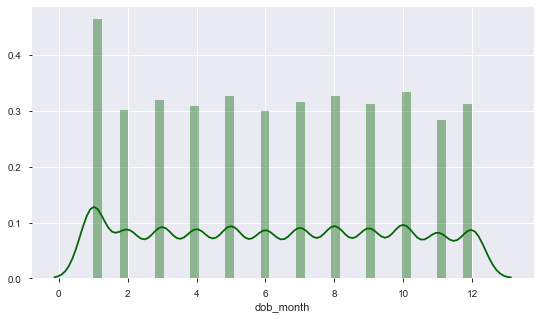

In [6]:
#Users of Facebook based on birth month

birth_month = facebook_data['dob_month']
plt.figure(figsize=(9,5))
plot = sns.distplot(birth_month, color='darkgreen')
plt.show()
#plot = sns.distplot(facebook_data['age'], color='b')
#plot.set_xlabel('Age')

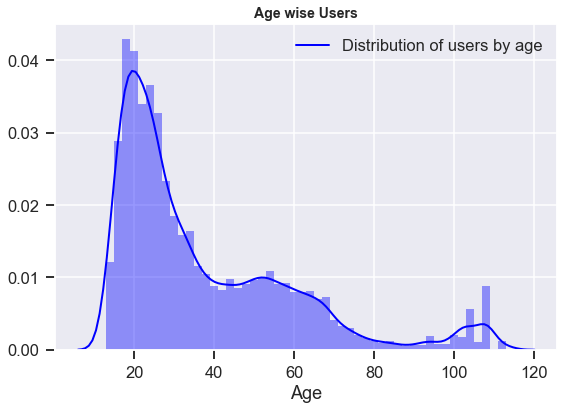

In [7]:
#how the users are distributed by Age 
sns.set_context("talk")
users_age = facebook_data['age']
plt.figure(figsize=(9,6))
g=sns.distplot(users_age, color='b', kde_kws={"color": "b", "lw": 2, "label": "Distribution of users by age"})
g.set_xlabel('Age')
g.grid(b=True)
#g.legend.set_title('Distribution of users by age')
g.set_title('Age wise Users', fontsize=14,fontweight='bold')
figure = g.get_figure()    
figure.savefig(local_path+'Agewise_dist.png', dpi=400)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


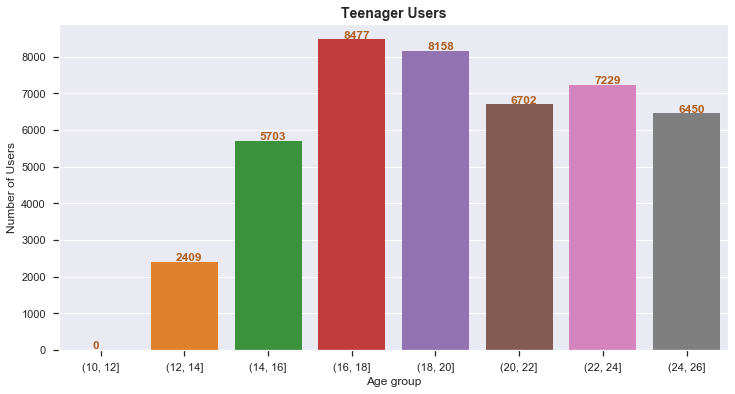

In [8]:
# finding users between 10 and 26 years of age
ten_to_twenty = facebook_data[(facebook_data['age'] > 10) & (facebook_data['age']  <= 26)]
bins = [10,12,14,16,18,20,22,24,26]
ten_to_twenty['age_bin']=pd.cut(ten_to_twenty['age'],bins)

teenagers = ten_to_twenty['age'].groupby(ten_to_twenty['age_bin']).count()

sns.set_context("notebook")
plt.figure(figsize=(12,6))
g=sns.barplot(teenagers.index, teenagers)
g.set_xlabel('Age group')
g.set_ylabel('Number of Users')
#g.legend.set_title('Distribution of users by age')
g.set_title('Teenager Users', fontsize=14,fontweight='bold')
for v,i in enumerate(teenagers):
    g.text(v-.1,i+30, str(i), color='#b0601d',fontweight='bold', fontsize=12)

figure = g.get_figure()    
figure.savefig(local_path+'Teenage_users.png', dpi=400)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


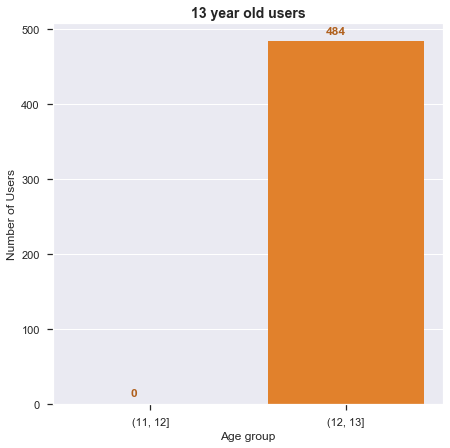

In [9]:
# Facebook's policy is to permit users above 13 years

upto_thirteen = facebook_data[facebook_data['age'] < 14]

bins = [11,12,13]

upto_thirteen['age_bin']=pd.cut(upto_thirteen['age'],bins)

under_teen = upto_thirteen['age'].groupby(upto_thirteen['age_bin']).count()

sns.set_context("notebook")
plt.figure(figsize=(7,7))
g=sns.barplot(under_teen.index, under_teen)
g.set_xlabel('Age group')
g.set_ylabel('Number of Users')
g.set_title('13 year old users', fontsize=14,fontweight='bold')
for v,i in enumerate(under_teen):
    g.text(v-.1,i+10, str(i), color='#b0601d',fontweight='bold', fontsize=12)

figure = g.get_figure()    
figure.savefig(local_path+'under_teen.png', dpi=400)

In [10]:

# Create age group bins
# Converting into categorical variable will ease the analysis

bins = [10,20,30,40,50,60,70,80,90,100,110,120]
facebook_data['age_bin']=pd.cut(facebook_data['age'],bins)
facebook_data['age_bin'].value_counts()

(20, 30]      28634
(10, 20]      24747
(30, 40]      12487
(50, 60]       9288
(40, 50]       8962
(60, 70]       6830
(100, 110]     3409
(70, 80]       2234
(90, 100]      1201
(80, 90]        803
(110, 120]      231
Name: age_bin, dtype: int64

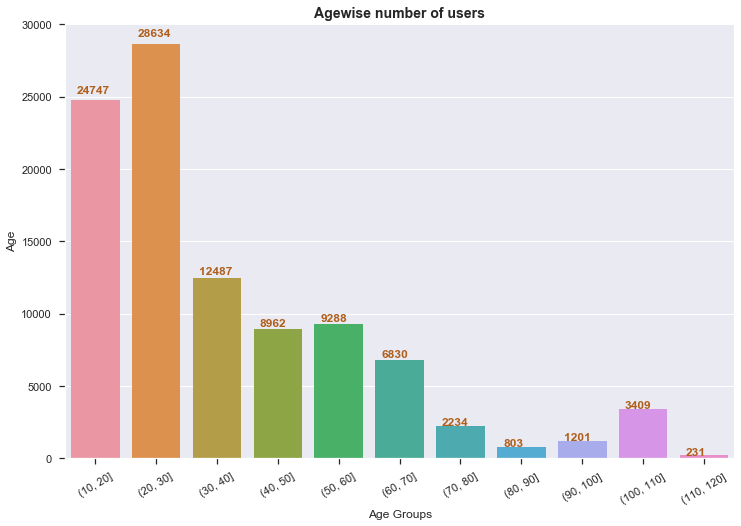

In [11]:
#number of users by age 

#
users_by_age = facebook_data['age'].groupby(facebook_data['age_bin']).count()

#users_by_age
plt.figure(figsize=(12,8))
g=sns.barplot(users_by_age.index, users_by_age)
#g.title("Agewise number of users")

g.set_title("Agewise number of users",fontsize=14,fontweight='bold')
g.set_ylabel('Age')
g.set_xlabel('Age Groups')
sns.set_style('white')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
for v,i in enumerate(users_by_age):
    g.text(v-.3,i*1.020, str(i), color='#b0601d',fontweight='bold', fontsize=12)

#figure = g.get_figure()    
#figure.savefig(local_path+'agewise_users.png', dpi=400)

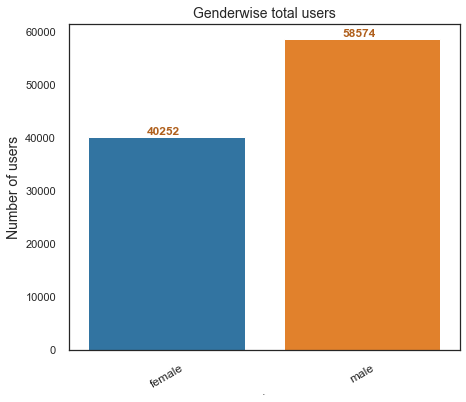

In [12]:
#number of users by gender

users_by_gender= facebook_data['userid'].groupby(facebook_data['gender']).count()
plt.figure(figsize=(7,6))
g=sns.barplot(users_by_gender.index,users_by_gender)

for v,i in enumerate(users_by_gender):
    g.text(v-.1,i*1.01, str(i), color='#b0601d',fontweight='bold', fontsize=12)
   
g.set_title("Genderwise total users",fontsize=14)
g.set_ylabel('Number of users',fontsize=14)
g.set_xlabel('Gender',fontsize=1)
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=12)
plt.show()
#figure = g.get_figure()    
# figure.savefig(local_path+'genderwise.png', dpi=400)

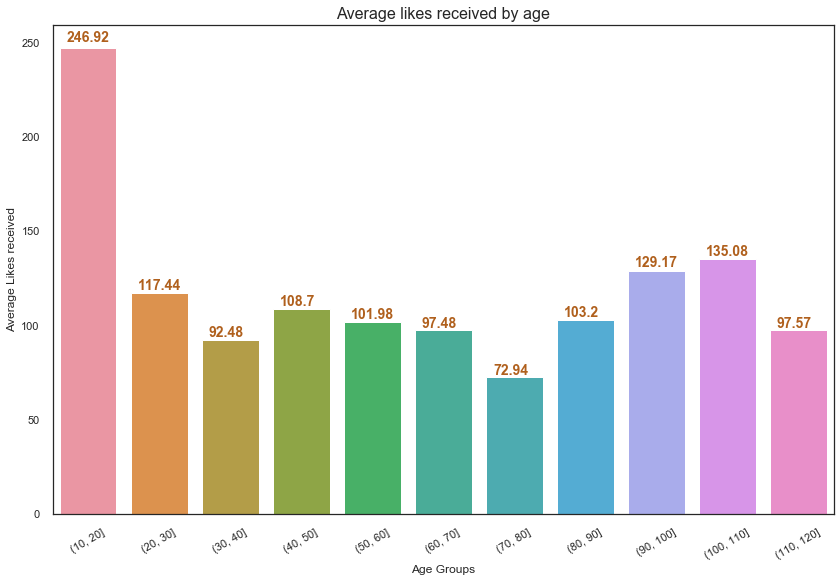

In [13]:
#Average likes received by Age number of likes by age

avg_likes_recd_age = round(facebook_data['likes_received'].groupby(facebook_data['age_bin']).mean(),2)
plt.figure(figsize=(14,9))
g=sns.barplot(avg_likes_recd_age.index,avg_likes_recd_age)
g.set_title("Average likes received by age",fontsize=16)
g.set_ylabel('Average Likes received')
g.set_xlabel('Age Groups')

for v,i in enumerate(avg_likes_recd_age):
    g.text(v-.3,i*1.015, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()
# figure = g.get_figure()    
# figure.savefig(local_path+'Avg_likes_recd_age.png', dpi=400)

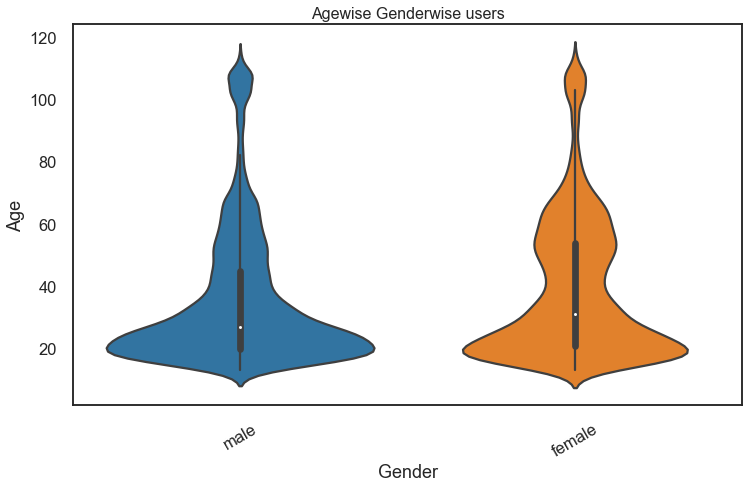

In [54]:
plt.figure(figsize=(12,7))
g=sns.violinplot(x='gender',y='age', data=facebook_data)
g.set_title("Agewise Genderwise users",fontsize=16)
g.set_xlabel('Gender')
g.set_ylabel('Age')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

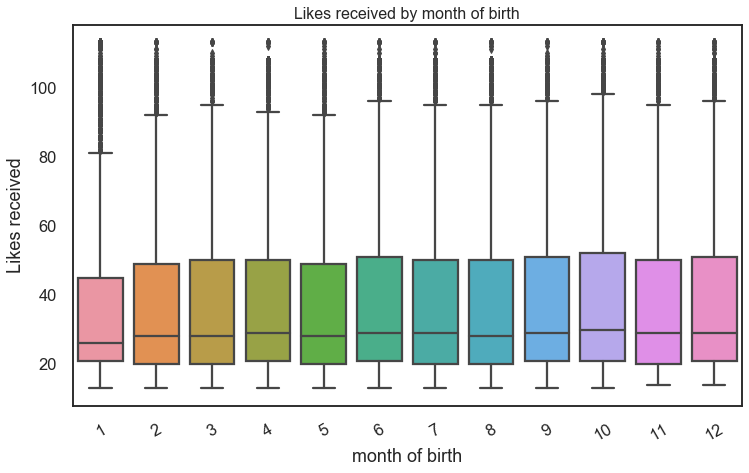

In [50]:
plt.figure(figsize=(12,7))
g=sns.boxplot(x='dob_month',y='age', data=facebook_data)
g.set_title("Likes received by month of birth",fontsize=16)
g.set_xlabel('month of birth')
g.set_ylabel('Likes received')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

In [36]:
avg_likes_recd_age = facebook_data['likes_received'].groupby(facebook_data['age_bin'])


age_bin
(10, 20]      246.919020
(20, 30]      117.436230
(30, 40]       92.476415
(40, 50]      108.698616
(50, 60]      101.982666
(60, 70]       97.480820
(70, 80]       72.935094
(80, 90]      103.195517
(90, 100]     129.170691
(100, 110]    135.079202
(110, 120]     97.571429
Name: likes_received, dtype: float64

In [22]:
#print(len(users_by_gender.index.values))
users_by_gender.index[:][:]


Index(['female', 'male'], dtype='object', name='gender')

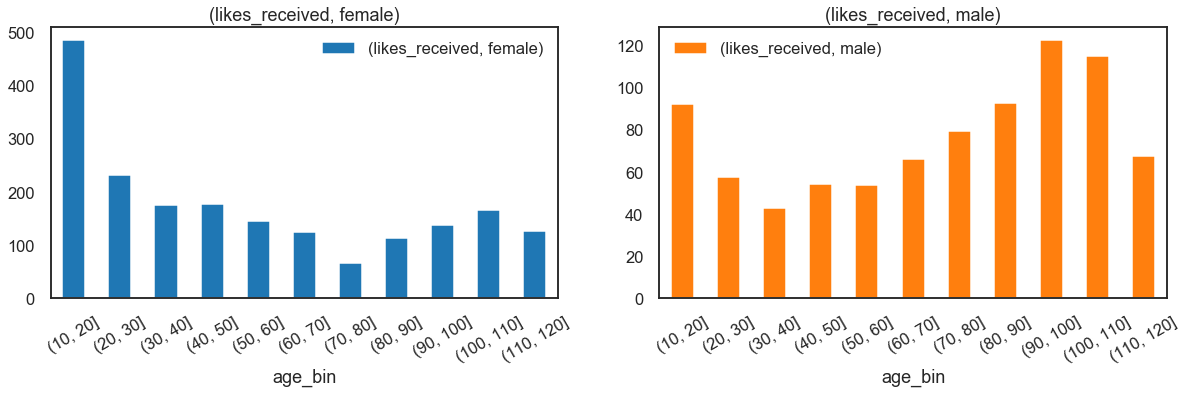

In [80]:
users_by_gender = facebook_data.pivot_table(index='age_bin',columns = 'gender',values=['likes_received'],aggfunc='mean')
g = users_by_gender.plot(kind='bar', subplots=True, rot=30, figsize=(20,5), layout=(1, 2))

# for v,i in enumerate(users_by_gender):
#     g[0].text(v-.3,i*1.015, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
plt.show()

In [81]:
facebook_data.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received', 'age_bin'],
      dtype='object')

In [95]:
#len(users_by_gender)
#users_by_gender.reset_index(inplace = True)
age_bin = []

users_by_gender = facebook_data.pivot_table(index='age_bin',columns = 'gender',values=['likes_received'],aggfunc='sum')
users_by_gender.reset_index(inplace=True)

for i in range(len(users_by_gender['age_bin'].values)):
    age_bin.append(str(users_by_gender['age_bin'].values[i])[1:7].split(','))
age_bin


[['10', ' 20'],
 ['20', ' 30'],
 ['30', ' 40'],
 ['40', ' 50'],
 ['50', ' 60'],
 ['60', ' 70'],
 ['70', ' 80'],
 ['80', ' 90'],
 ['90', ' 10'],
 ['100', ' 1'],
 ['110', ' 1']]

In [96]:
users_by_gender

age_bin likes_received         
gender                     female     male
0         (10, 20]        4721059  1389446
1         (20, 30]        2279513  1083156
2         (30, 40]         819415   335338
3         (40, 50]         701515   272642
4         (50, 60]         713047   234168
5         (60, 70]         456490   209304
6         (70, 80]          83085    79852
7         (80, 90]          44014    38852
8        (90, 100]          68651    86483
9       (100, 110]         219583   240902
10      (110, 120]          14831     7708

In [89]:
#number of users by gender
#dfp = df.pivot_table(index='Month', columns='Code', values=['ColA', 'ColB'], aggfunc='sum')

#users_by_gender = facebook_data.pivot_table(index='age_bin',columns = 'gender',values=['likes_received'],aggfunc='sum')
#
#users_by_gender= facebook_data.groupby(['gender','age_bin']).count()
g=sns.barplot(x=age_bin, y=users_by_gender['likes_received'])

# for v,i in enumerate(users_by_gender):
#     g.text(v-.1,i*1.02, str(i), color='#b0601d',fontweight='bold', fontsize=12)

g.set_title("Genderwise total users",fontsize=14)
g.set_ylabel('Number of users',fontsize=14)
g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=12)
plt.show()
# figure = g.get_figure()    
# figure.savefig(local_path+'user_by_gender.png', dpi=400)

TypeError: unhashable type: 'list'

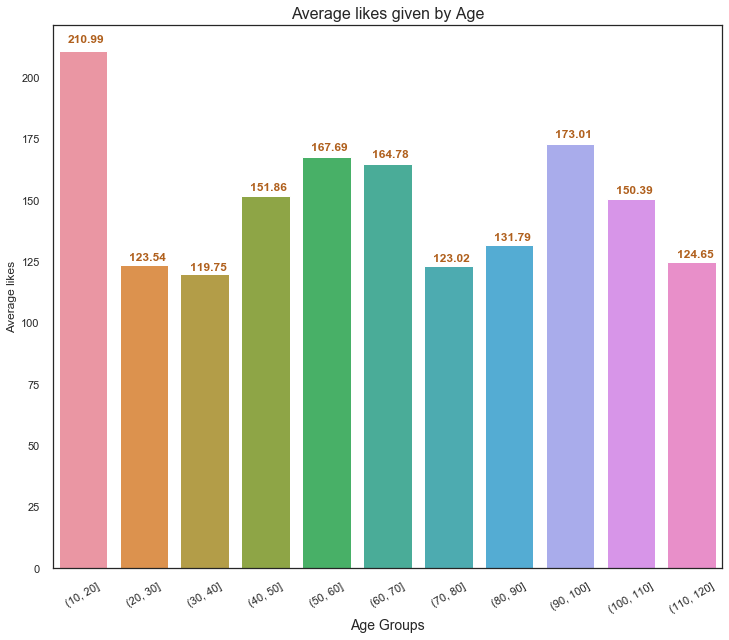

In [97]:
#Average number of likes by age 

avg_likes = facebook_data['likes'].groupby(facebook_data['age_bin']).mean()
plt.figure(figsize=(12,10))
g=sns.barplot(avg_likes.index,avg_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=11)

g.set_title("Average likes given by Age",fontsize=16)
g.set_ylabel('Average likes',fontsize=12)
g.set_xlabel('Age Groups',fontsize=14)

for v,i in enumerate(avg_likes):
    g.text(v-.25,i*1.015, str(round(i,2)), color='#b0601d',fontweight='bold', fontsize=12)

# figure = g.get_figure()    
# figure.savefig(local_path+'avg_likes_age.png', dpi=400)

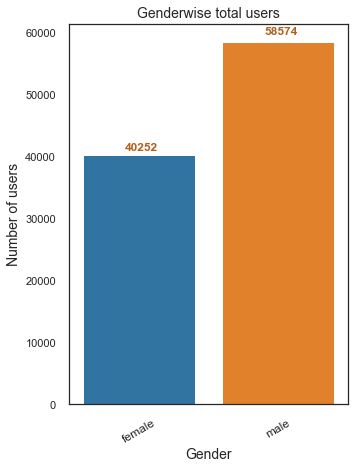

In [16]:
#number of users by gender
users_by_gender= facebook_data['userid'].groupby(facebook_data['gender']).count()
plt.figure(figsize=(5,7))

g=sns.barplot(users_by_gender.index,users_by_gender )

for v,i in enumerate(users_by_gender):
    g.text(v-.1,i*1.02, str(i), color='#b0601d',fontweight='bold', fontsize=12)
   
g.set_title("Genderwise total users",fontsize=14)
g.set_ylabel('Number of users',fontsize=14)
g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=12)

plt.show()
#figure = g.get_figure()    
#figure.savefig('gender-svm_conf.png', dpi=400)

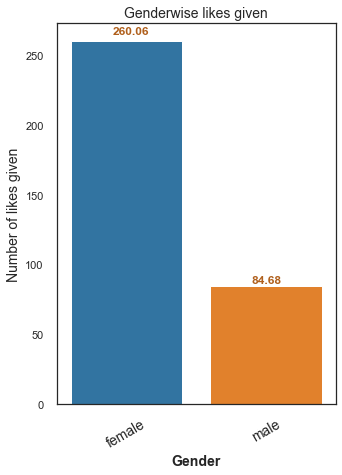

In [17]:
#Average number of likes by gender 

avg_likes = round(facebook_data['likes'].groupby(facebook_data['gender']).mean(),2)
plt.figure(figsize=(5,7))

g=sns.barplot(avg_likes.index,avg_likes)

for v,i in enumerate(avg_likes):
    g.text(v-.1,i*1.02, str(i), color='#b0601d',fontweight='bold', fontsize=12)
   
g.set_title("Genderwise likes given",fontsize=14)
g.set_ylabel('Number of likes given',fontsize=14)
g.set_xlabel('Gender',fontsize=14,fontweight='bold')
g.set_xticklabels(g.get_xticklabels(),fontsize=14, rotation=30)

plt.show()

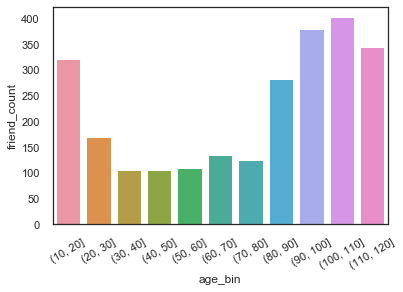

In [18]:
#Average number of friends by age 

avg_likes = facebook_data['friend_count'].groupby(facebook_data['age_bin']).mean()

g=sns.barplot(avg_likes.index,avg_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()


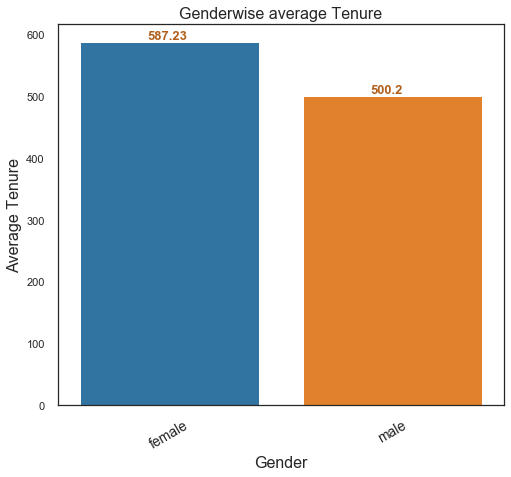

In [19]:
#Gender wise tenure

gender_tenure = round(facebook_data.groupby(['gender']).mean(),2)

plt.figure(figsize=(8,7))
g = sns.barplot(gender_tenure.index,gender_tenure['tenure'])
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=14)

g.set_title("Genderwise average Tenure",fontsize=16)
g.set_ylabel('Average Tenure',fontsize=16)
g.set_xlabel('Gender',fontsize=16)

for v,i in enumerate(gender_tenure['tenure']):
    g.text(v-.1,i*1.01, str(i), color='#b0601d',fontweight='bold', fontsize=13)
plt.show()

#figure = g.get_figure()    
#figure.savefig(local_path+'gender_tenure.png', dpi=400)           

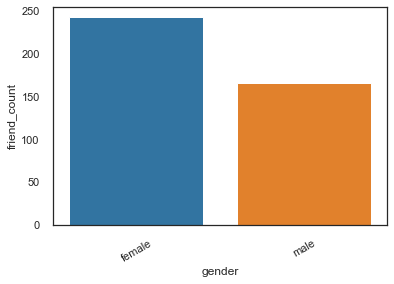

In [20]:
#Average number of friends by Gender 

avg_likes = facebook_data['friend_count'].groupby(facebook_data['gender']).mean()

g=sns.barplot(avg_likes.index,avg_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

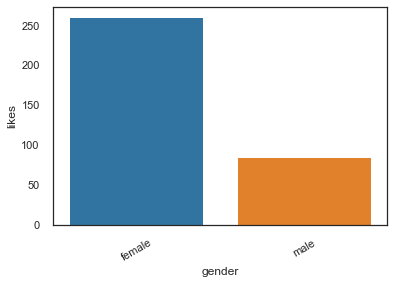

In [30]:
#Average number of likes by Gender 

avg_likes = facebook_data['likes'].groupby(facebook_data['gender']).mean()

g=sns.barplot(avg_likes.index,avg_likes)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

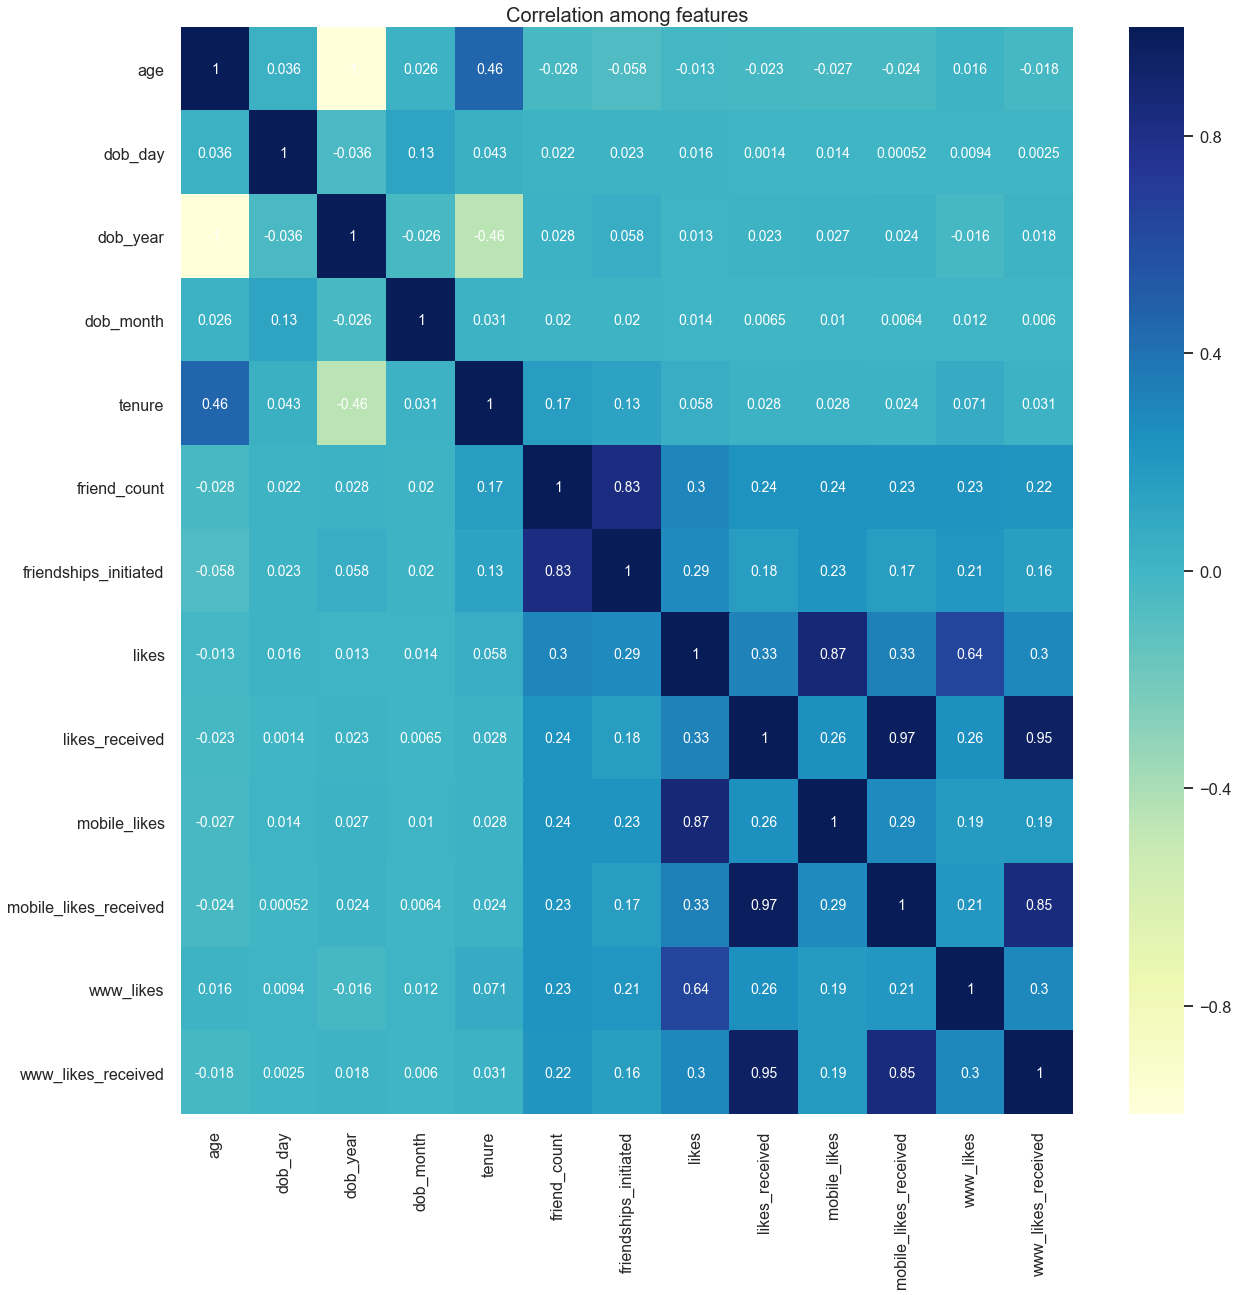

In [105]:
sns.set_context("talk")
corr_values = facebook_data.corr()
corr_values.drop('userid', axis =1, inplace = True)
corr_values.drop('userid', axis =0, inplace = True)


plt.figure(figsize =(20,20))
g = sns.heatmap(corr_values,annot=True,annot_kws={"size": 14,"color":"#FFFFFF"},cmap="YlGnBu")

g.set_title("Correlation among features",fontsize=20)
#g.set_ylabel('Number of users',fontsize=10)
#g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=90,fontsize=16)
g.set_yticklabels(g.get_yticklabels(),fontsize=16)
plt.show()
# figure = g.get_figure()    
# figure.savefig(local_path+'corr_graph.png', dpi=400)


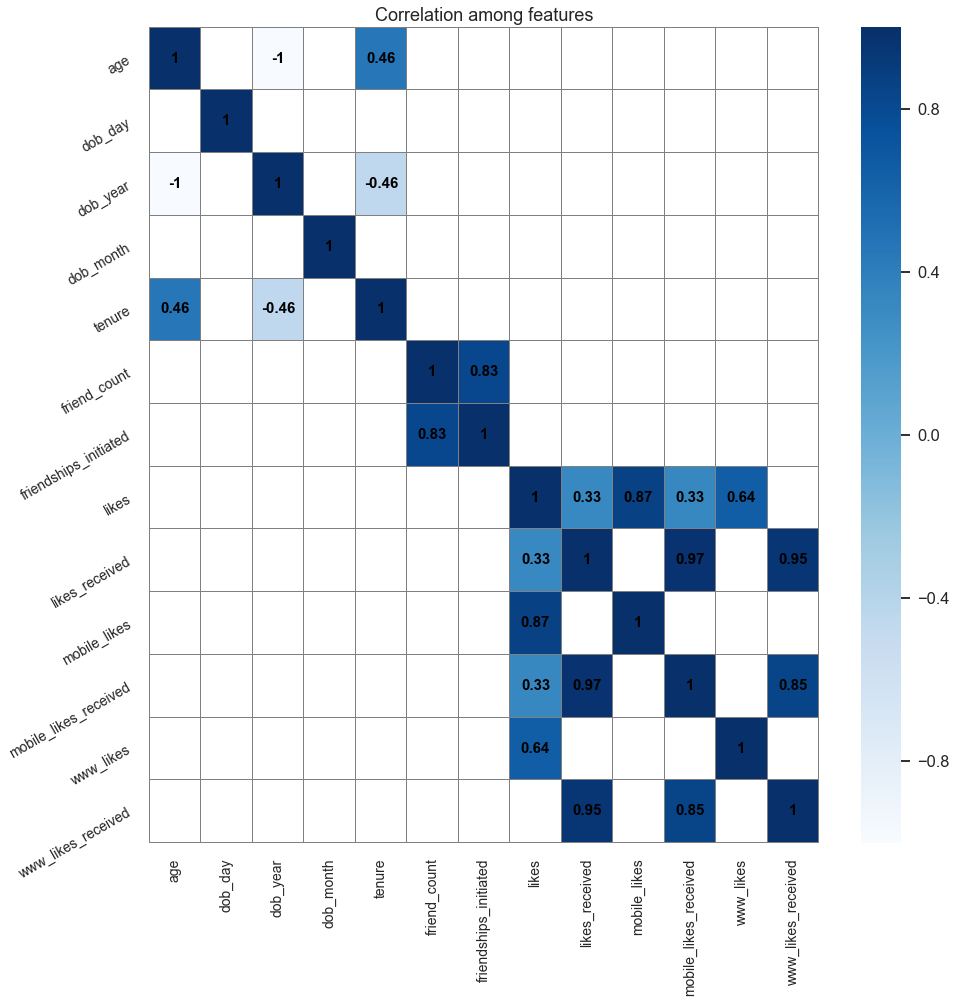

In [32]:
#Correlations among variables with values > 30%
#some of them are obvious, e.g. Likes vs Mobile Likes
plt.figure(figsize = (15,15))

positive_corr = corr_values[(corr_values > 0.3) | (corr_values < - 0.3)]

#positive_corr= positive_corr.dropna(axis = 0)
#g = sns.heatmap(corr_values,annot=True,annot_kws={"size": 14,"color":"#FFFFFF"},cmap="YlGnBu")
#g = sns.heatmap(positive_corr,linewidths=0.5,linecolor='grey',cmap="YlGnBu", annot=True)

g = sns.heatmap(positive_corr,linecolor='grey', linewidths=0.05, cmap="Blues", annot=True,annot_kws={"size": 15,"color":"#000000","weight":"bold"})

g.set_title("Correlation among features",fontsize=18)
#g.set_ylabel('Number of users',fontsize=10)
#g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(), rotation=90,fontsize=14)
g.set_yticklabels(g.get_yticklabels(),rotation=30, fontsize=14)
# figure = g.get_figure()    
# figure.savefig(local_path+'corr_graph_limited.png', dpi=400)

plt.show()


Suprisingly 
- Tenure is not (higly) related with Friendship count or likes
- Friendhship_count is not (higly) related with likes
- 'Mobile_likes' is highly related with 'likes'. THis conveys that people are using mobile more than a computer for FB


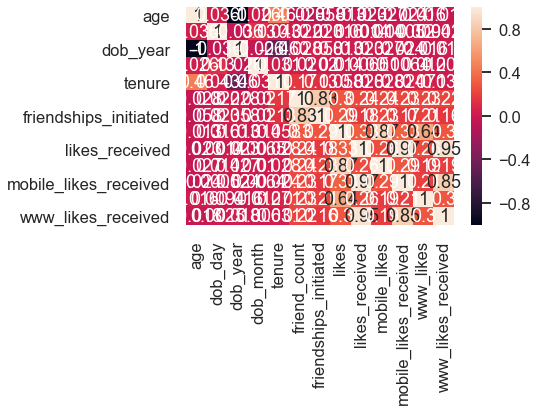

In [112]:
negative_corr = corr_values
#positive_corr= positive_corr.dropna(axis = 0)
sns.heatmap(negative_corr,annot= True)
plt.show()

In [98]:
corr_length = len(corr_values)

fig, (ax,ax2,ax3) = plt.subplots(ncols=3)

for i in range (corr_length):
    for j in range(corr_length):
        if (corr_values.index[i] != corr_values.columns[j]):
            if (corr_values.iloc[i][j] > 0.40) or (corr_values.iloc[i][j] < -0.40) :
               # print(corr_values.index[i],corr_values.columns[j],corr_values.iloc[i][j])
                 sns.heatmap(corr_values.index[i],corr_values.iloc[i][j],ax)


NameError: name 'corr_values' is not defined

In [ ]:
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
age_bin                  99003 non-null category

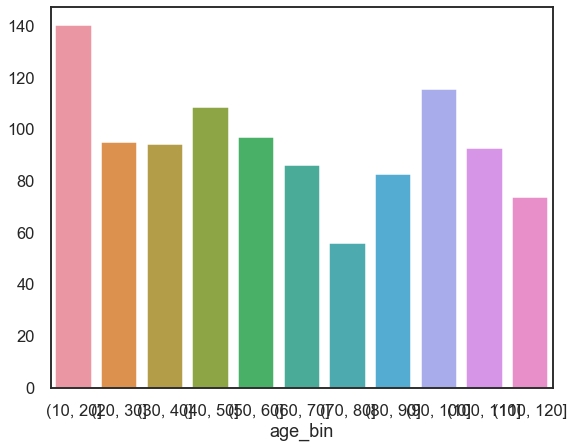

In [24]:
plt.figure(figsize = (9,7))
mobile_likes_by_age = facebook_data.groupby(facebook_data['age_bin']).mean()
sns.barplot(mobile_likes_by_age.index, mobile_likes_by_age['mobile_likes'].values)


In [ ]:
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64

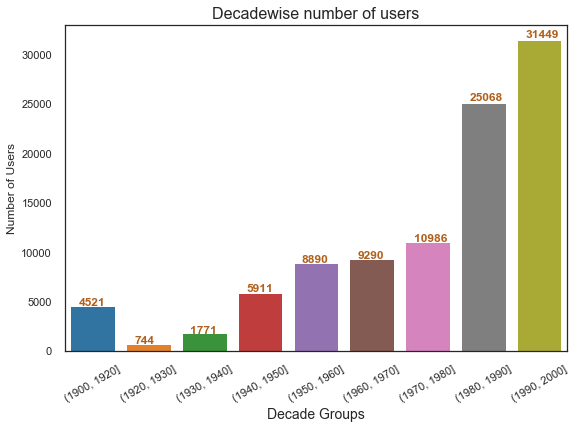

In [99]:
bins = [1900,1920,1930,1940,1950,1960,1970,1980,1990,2000]
facebook_data['decade_bin']=pd.cut(facebook_data['dob_year'],bins)

plt.figure(figsize = (9,6))
users_by_decade = facebook_data['dob_year'].groupby(facebook_data['decade_bin']).count()
#barWidth = 0.9
#g=sns.barplot(users_by_decade.index, users_by_decade,color='#ebbe12')
g=sns.barplot(users_by_decade.index, users_by_decade)
#p=sns.barplot(users_by_decade_per.index, users_by_decade_per,color='#ebbe12')
#g.set_yticks(users_by_decade+barWidth/1.5)
#g.title("Agewise number of users")



for v,i in enumerate(users_by_decade):
    g.text(v-.25,i*1.01, str(i), color='#b0601d',fontweight='bold', fontsize=12)
    #print(i,v)

g.set_title("Decadewise number of users",fontsize=16)
g.set_ylabel('Number of Users',fontsize=12)
g.set_xlabel('Decade Groups',fontsize=14)
sns.set_style('white')
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=11)




# figure = g.get_figure()    
# figure.savefig(local_path+'decadewiseusers.png', dpi=400)




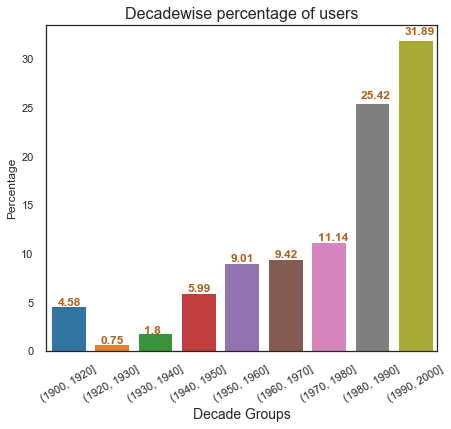

In [101]:
#users_by_decade
total= users_by_decade.sum()
users_by_decade_per=[]

plt.figure(figsize = (7,6))

for i in range(len(users_by_decade)):
    t= round(users_by_decade[i]*100/total,2)
    users_by_decade_per.append(t)

xlabels= g.get_xticklabels()

g=sns.barplot(users_by_decade.index, users_by_decade_per)

for v,i in enumerate(users_by_decade_per):
    g.text(v-.25,i*1.02, str(i), color='#b0601d',fontweight='bold', fontsize=12)
    #print(i,v)
g.set_title("Decadewise percentage of users",fontsize=16)
g.set_ylabel('Percentage',fontsize=12)
g.set_xlabel('Decade Groups',fontsize=14)
g.set_xticklabels(xlabels, rotation=30,fontsize=11)
plt.show()
# figure = g.get_figure()    
# figure.savefig(local_path+'decadewise_per_users.png', dpi=400)


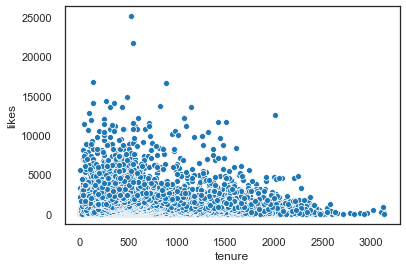

In [102]:
sns.scatterplot(facebook_data['tenure'],facebook_data['likes'])

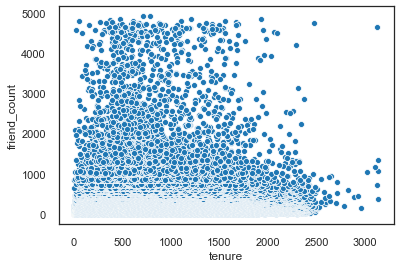

In [103]:
sns.scatterplot(facebook_data['tenure'],facebook_data['friend_count'])

In [ ]:
#fb_pivot = pd.pivot_table(facebook_data,['likes','friend_count'],'gender')
#sns.barplot(fb_pivot.values,fb_pivot.index,orient='h')

#sns.lineplot(fb_pivot.values,fb_pivot.index)
fb_pivot=pd.pivot_table(facebook_data, index=['gender'], values=['likes'], aggfunc=[np.mean])


sns.barplot(fb_pivot.values,fb_pivot.index,orient = 'h')#

#pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],columns=["Product"],aggfunc=[np.sum])

In [ ]:
#genderwise average likes given

gender_likes=round(facebook_data['likes'].groupby(facebook_data['gender']).mean(),2)

plt.figure(figsize=(8,10))

g=sns.barplot(gender_likes.index,gender_likes,orient = 'v')

for v,i in enumerate(gender_likes):
    g.text(v-.1,i*1.015, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
g.set_title("Genderwise average likes",fontsize=16)
g.set_ylabel('Mean likes',fontsize=12)
g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

figure = g.get_figure()    
figure.savefig(local_path+'genderwise_avg_likes.png', dpi=400)

In [ ]:
#genderwise average likes received

gender_likes=round(facebook_data['likes_received'].groupby(facebook_data['gender']).mean(),2)

plt.figure(figsize=(8,10))

g=sns.barplot(gender_likes.index,gender_likes,orient = 'v')

for v,i in enumerate(gender_likes):
    g.text(v-.1,i*1.025, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
g.set_title("Genderwise average likes received",fontsize=16)
g.set_ylabel('Mean likes received',fontsize=12)
g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

figure = g.get_figure()    
figure.savefig(local_path+'genderwise_avg_likes_recd.png', dpi=400)

In [ ]:
#genderwise average friends

gender_friend = round(facebook_data.groupby(['gender']).mean(),2)

friend_count = gender_friend['friend_count']
friend_init = gender_friend['friendships_initiated']

plt.figure(figsize=(8,6))
g = sns.barplot(gender_friend.index,friend_count,orient = 'v')

for v,i in enumerate(friend_count):
    g.text(v-.1,i+2, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
g.set_title("Genderwise average friends",fontsize=16)
g.set_ylabel('Average friends',fontsize=12)
g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

figure = g.get_figure()    
figure.savefig(local_path+'genderwise_Avg_frnd.png', dpi=400)




In [ ]:
#genderwise average friendships initiated

plt.figure(figsize=(8,6))

g = sns.barplot(gender_like.index,friend_init,orient = 'v')

for v,i in enumerate(friend_init):
    g.text(v-.1,i+1, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
g.set_title("Genderwise average friendships initiated",fontsize=16)
g.set_ylabel('Average friendships initiated',fontsize=13)
g.set_xlabel('Gender',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

figure = g.get_figure()    
figure.savefig(local_path+'genderwise_Avg_frndship.png', dpi=400)


## age wise and genderwise likes and likes recd - pending

In [110]:
#facebook_data.head()

age_group = pd.pivot_table(facebook_data,values='likes_received',index=['age_bin'],legend='bottom',columns=['gender'],aggfunc=np.mean)

age_group = round( age_group,2)

sns.catplot(age_group.index,age_group.values,kind='bar')

TypeError: pivot_table() got an unexpected keyword argument 'legend'

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11')]

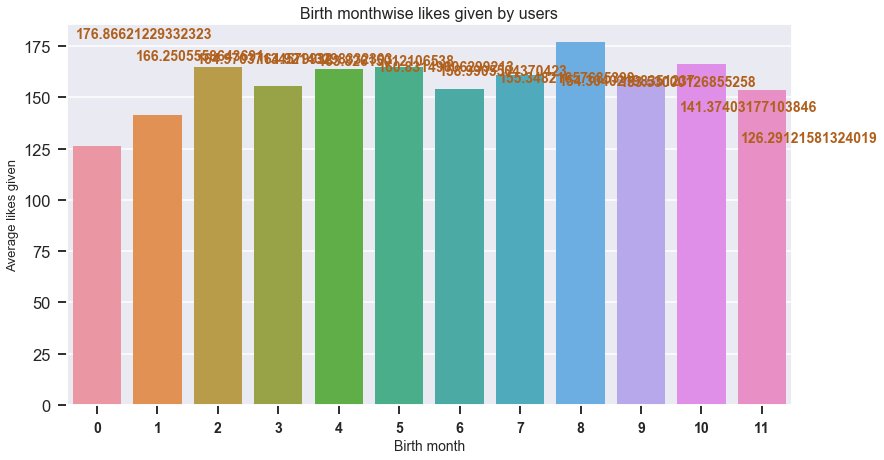

In [204]:
#month of birth vs likes recevied, likes given

birth_month_likes_recd = round( facebook_data.groupby(['dob_month']).mean(),2)
birth_month_likes_recd.sort_values('likes', ascending = False,inplace=True)

bm_sorted_graph  =  facebook_data.groupby(['dob_month']).mean().reset_index().sort_values('likes', ascending=False)
bm_sorted_graph.set_index('dob_month')

#result = df.groupby(["Id"])['Speed'].aggregate(np.median).reset_index().sort_values('Speed')

#bm_index = birth_month_likes_recd.index
#likes_values= birth_month_likes_recd['likes'].values

plt.figure(figsize=(13,7))

g = sns.barplot(bm_sorted_graph.index,bm_sorted_graph.likes,orient = 'v')

for v,i in enumerate(bm_sorted_graph['likes']):
    g.text(v-.35,i+2, str(i), color='#b0601d',fontweight='bold', fontsize=14)
    
g.set_title("Birth monthwise likes given by users",fontsize=16)
g.set_ylabel('Average likes given',fontsize=13)
g.set_xlabel('Birth month',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

#figure = g.get_figure()    
#figure.savefig(local_path+'BIrthMonthwise_Likes.png', dpi=400)


In [190]:
bm_sorted_graph  =  facebook_data.groupby(['dob_month']).mean().reset_index().sort_values('likes',ascending=False)
bm_sorted_graph.set_index('dob_month')
#df.set_index('month')

,userid,age,dob_day,dob_year,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
dob_month,,,,,,,,,,,,,
9,1.598849e+06,37.768396,15.135555,1975.231604,554.067399,202.758299,111.219361,176.866212,175.226934,119.812571,104.662249,57.053641,70.564685
11,1.603044e+06,37.367287,15.318510,1975.632713,545.894108,200.708032,108.694969,166.250556,138.051973,114.520150,81.181073,51.730406,56.870762
6,1.603358e+06,37.383987,14.715302,1975.616013,545.610877,204.958520,112.536871,164.970371,151.148670,110.328417,86.207927,54.641954,64.940743
3,1.594681e+06,37.205435,14.884867,1975.794565,543.365534,199.759358,106.730204,164.921433,134.639407,113.239531,78.793453,51.681902,55.845954
5,1.603314e+06,36.583777,15.073366,1976.416223,527.676755,205.287530,114.138862,163.826150,137.903511,113.597337,83.110048,50.228814,54.793220
8,1.592428e+06,36.878498,15.530951,1976.121502,544.175651,211.865173,117.424955,160.831496,197.489643,110.971896,116.892792,49.859600,80.596850
10,1.594045e+06,38.443539,15.343137,1974.556461,547.682849,194.603945,104.000236,158.990550,139.022561,105.599102,81.998819,53.391448,57.023742
4,1.597387e+06,37.298178,14.709135,1975.701822,545.865923,201.423531,110.852579,155.348217,133.238389,105.445471,79.774314,49.902617,53.464075
7,1.592577e+06,37.153510,15.365601,1975.846490,537.050462,196.336123,108.666875,154.304022,133.264676,101.602298,78.130152,52.701724,55.134524


In [168]:
likes_values= birth_month_likes_recd['likes'].values
likes_values

array([176.87, 166.25, 164.97, 164.92, 163.83, 160.83, 158.99, 155.35,
       154.3 , 153.53, 141.37, 126.29])

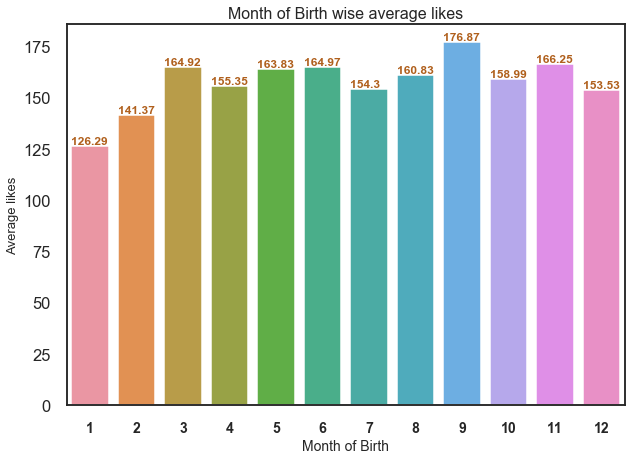

In [50]:
#Birth month wise likes


bm_likes = round(facebook_data.groupby('dob_month').mean(),2)

plt.figure(figsize=(10,7))

g = sns.barplot(bm_likes.index,bm_likes['likes'],orient = 'v')

for v,i in enumerate(bm_likes['likes']):
    g.text(v-.4,i+1, str(i), color='#b0601d',fontweight='bold', fontsize=12)
    
g.set_title("Month of Birth wise average likes",fontsize=16)
g.set_ylabel('Average likes',fontsize=13)
g.set_xlabel('Month of Birth',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

figure = g.get_figure()    
figure.savefig(local_path+'bm_likes.png', dpi=400)


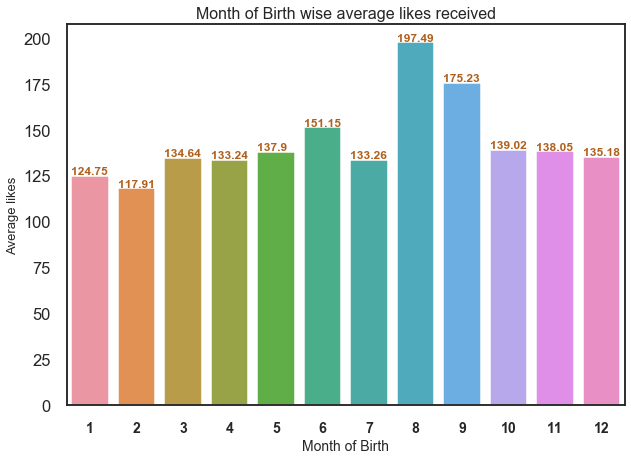

In [53]:
#Birth month wise likes received

#bm_likes_recd = round(facebook_data.groupby('dob_month').mean(),2)

plt.figure(figsize=(10,7))

g = sns.barplot(bm_likes.index,bm_likes['likes_received'],orient = 'v')

for v,i in enumerate(bm_likes['likes_received']):
    g.text(v-.4,i+1, str(i), color='#b0601d',fontweight='bold', fontsize=12)
    
g.set_title("Month of Birth wise average likes received",fontsize=16)
g.set_ylabel('Average likes',fontsize=13)
g.set_xlabel('Month of Birth',fontsize=14)
g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')

figure = g.get_figure()    
figure.savefig(local_path+'bm_likes_recd.png', dpi=400)

In [ ]:
sns.barplot(gender_t.index,gender_t['mobile_likes'])

In [ ]:
sns.barplot(gender_t.index,gender_t['www_likes'])

In [ ]:
#copy of already created variable - Genderwise grouping of features of Facebook Data


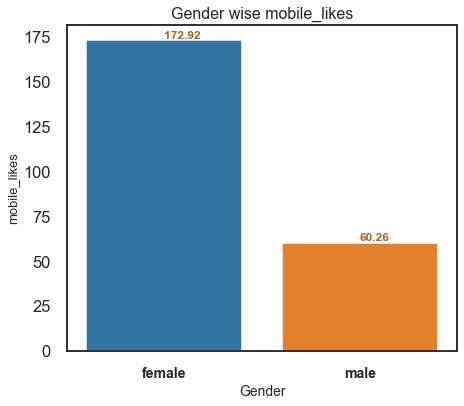

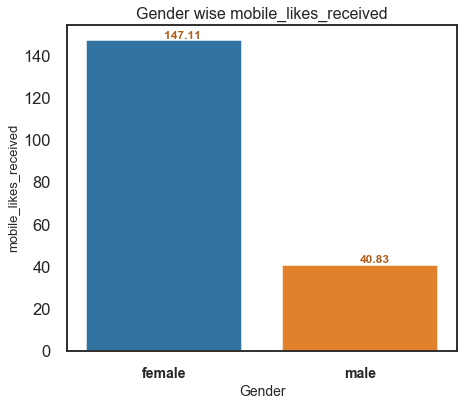

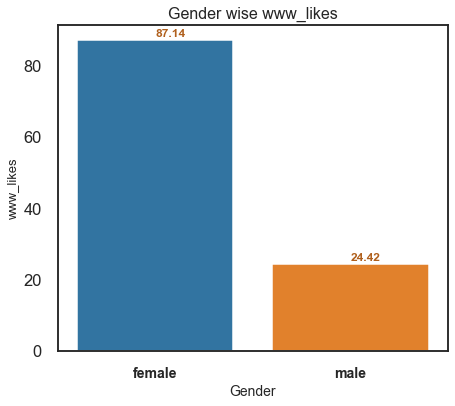

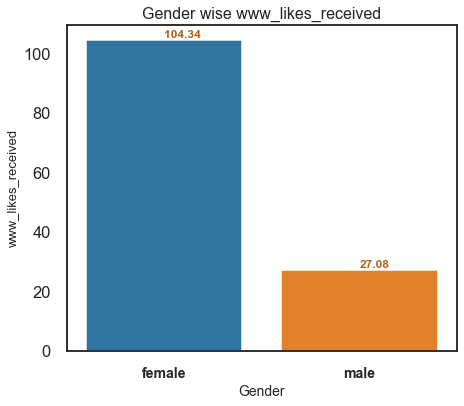

In [366]:
#genderwise device preference

# copy from a previously created variable - gender_tenure

device_likes = gender_tenure[['mobile_likes', 'mobile_likes_received', 'www_likes','www_likes_received']]

# use a for loop to create a graph for each of the feature

for j in range(4):
    plt.figure(figsize=(7,6))
    val = device_likes.iloc[:,j]
    g = sns.barplot(device_likes.index, val,orient = 'v')
    for v,i in enumerate(val):
        g.text(v,i+1, str(i), color='#b0601d',fontweight='bold', fontsize=12)
    g.set_title('Gender wise '+device_likes.columns[j], fontsize=16)
    g.set_ylabel(device_likes.columns[j],fontsize=13)
    g.set_xlabel('Gender', fontsize=14)
    g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold')
    plt.show(j+1,j)
    figure = g.get_figure()    
    figure.savefig(local_path+'genderwise '+device_likes.columns[j]+'.png', dpi=400)
    

In [349]:
device_likes1 = gender_tenure[['mobile_likes', 'mobile_likes_received', 'www_likes','www_likes_received']]
device_likes1

,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,
female,172.92,147.11,87.14,104.34
male,60.26,40.83,24.42,27.08


In [ ]:
#Age group wise device preference

agewise_device = round(facebook_data.groupby('age_bin').mean(),2)
agewise_device= agewise_device[['mobile_likes', 'mobile_likes_received', 'www_likes','www_likes_received']]


for j in range(4):
    plt.figure(figsize=(9,9))
    val = agewise_device.iloc[:,j]
    g = sns.barplot(agewise_device.index, val,orient = 'v')
    for v,i in enumerate(val):
        g.text(v-.3,i+1, str(i), color='#b0601d',fontweight='bold', fontsize=12)
    g.set_title('Age wise '+agewise_device.columns[j], fontsize=16)
    g.set_ylabel(agewise_device.columns[j],fontsize=13)
    g.set_xlabel('Age Group', fontsize=14)
    g.set_xticklabels(g.get_xticklabels(),fontsize=14,fontweight='bold',rotation=30)
    plt.show(j+1,j)
    figure = g.get_figure()    
    figure.savefig(local_path+'agewise '+agewise_device.columns[j]+'.png', dpi=400)
    

In [18]:
zerotenure = facebook_data[facebook_data['tenure']==0]
zerotenure.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
14,1932519,13,28,2000,3,female,0.0,0,0,0,0,0,0,0,0
22,1514978,13,2,2000,9,male,0.0,0,0,0,0,0,0,0,0
27,2163454,15,15,1998,11,male,0.0,0,0,0,0,0,0,0,0
45,1784528,14,8,1999,3,male,0.0,0,0,0,0,0,0,0,0


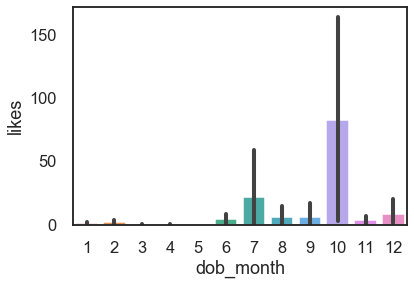

In [30]:
sns.barplot(y='likes',x='dob_month',data=zerotenure,orient='v')

In [31]:
# find out if there are any users with no friends

zerofriends = facebook_data[facebook_data['friend_count']==0]
zerofriends.head()

# Yes there are users!!
# 

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


Lets see how their data looks!

In [36]:
zerofriends.describe()

#there are  1962 such users 
#more interestingly, they have given and received likes!

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,1.962000e+03,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.0,1962.0,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000
mean,1.586841e+06,31.916412,12.905199,1981.083588,5.808869,241.666667,0.0,0.0,1.948012,0.600408,1.167686,0.226300,0.780326,0.374108
std,3.410760e+05,14.497468,9.084463,14.497468,3.688767,255.100158,0.0,0.0,22.169054,4.763382,20.813195,1.837277,7.611631,3.737389
min,1.000183e+06,13.000000,1.000000,1905.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.296912e+06,22.000000,4.000000,1974.000000,2.000000,28.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.570307e+06,28.000000,12.000000,1985.000000,5.000000,182.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.882117e+06,39.000000,20.000000,1991.000000,9.000000,367.750000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.193232e+06,108.000000,31.000000,2000.000000,12.000000,1901.000000,0.0,0.0,848.000000,100.000000,848.000000,56.000000,246.000000,91.000000


### user who has received 848 likes! she is a female and all likes are given through mobile 
### and 1 like received through website
### this could potentially be a fake profile

In [37]:
zerofriends[zerofriends['likes']==848]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1961,1609579,20,23,1993,1,female,257.0,0,0,848,1,848,0,0,1


In [39]:
inactive_profile = facebook_data[(facebook_data['tenure'] > 12) & (facebook_data['friend_count']==0)]
inactive_profile.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,1.697000e+03,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.0,1697.0,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,1.582466e+06,32.690631,13.096641,1980.309369,5.804950,278.661167,0.0,0.0,1.783147,0.427814,1.183265,0.168533,0.599882,0.259281
std,3.397324e+05,14.565333,9.061574,14.565333,3.658671,255.152658,0.0,0.0,22.827028,3.550794,22.233670,1.163974,5.097708,2.799292
min,1.000183e+06,13.000000,1.000000,1905.000000,1.000000,13.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.293930e+06,23.000000,5.000000,1973.000000,2.000000,71.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.564292e+06,28.000000,12.000000,1985.000000,5.000000,225.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.871735e+06,40.000000,20.000000,1990.000000,9.000000,397.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.193232e+06,108.000000,31.000000,2000.000000,12.000000,1901.000000,0.0,0.0,848.000000,72.000000,848.000000,17.000000,88.000000,56.000000


### There are 1697 such users with zero friends but tenure being more than 12!
### They have given and received likes.
###

In [42]:
max_tenure_inactive_profile = facebook_data[(facebook_data['tenure'] > 500) & (facebook_data['friend_count']==0)]
max_tenure_inactive_profile.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2.680000e+02,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,1.562739e+06,34.500000,12.320896,1978.500000,5.649254,727.496269,0.0,0.0,0.820896,0.134328,0.022388,0.074627,0.798507,0.059701
std,3.365421e+05,14.486853,9.125099,14.486853,3.668384,250.388111,0.0,0.0,5.922535,1.089899,0.171638,0.555893,5.923077,0.583945
min,1.001574e+06,14.000000,1.000000,1916.000000,1.000000,502.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.268909e+06,24.000000,3.000000,1970.000000,2.000000,564.250000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.530080e+06,30.000000,12.000000,1983.000000,5.000000,631.500000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.857630e+06,43.000000,19.250000,1989.000000,9.000000,801.250000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.169556e+06,97.000000,31.000000,1999.000000,12.000000,1901.000000,0.0,0.0,71.000000,16.000000,2.000000,7.000000,71.000000,9.000000
